##*Amazon Apparel Recommendation System*

By Nakshatra Singh

###**1. Retrieve and Inspect Dataset** 

Let's download the Amazon Apparel dataset which is uploaded on my google drive. 

In [ ]:
!gdown --id 1xWkZ70Fc0y0WvzI-4Iw8fbPI9hP_biZT

Downloading...
From: https://drive.google.com/uc?id=1xWkZ70Fc0y0WvzI-4Iw8fbPI9hP_biZT
To: /content/tops_fashion.json
263MB [00:01, 137MB/s]


We have a json file which consists of all information about the products, we'll be loading the data using pandas `read_json`. 

In [ ]:
import pandas as pd

data = pd.read_json('/content/tops_fashion.json') 

Let's see how many rows and columns our dataset has?

In [ ]:
print('Number of data points : ', data.shape[0])
print() 
print('Number of features/variables:', data.shape[1]) 

Number of data points :  183138

Number of features/variables: 19


What are the features/column names present?

In [ ]:
data.columns # prints column-names or feature-names.

Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')

Each product/item has 19 features in the raw dataset.

Of these 19 features, we will be using only 7 features in this notebook.
1. asin  ( Amazon standard identification number)
2. brand ( brand to which the product belongs to )
3. color ( Color information of apparel, it can contain many colors as  a value ex: red and black stripes ) 
4. product_type_name ( type of the apperal, ex: SHIRT/TSHIRT )
5. medium_image_url  ( url of the image )
6. title ( title of the product. )
7. formatted_price ( price of the product )

In [ ]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']] 

Now, let's have a glimpse at our dataframe.

In [ ]:
print('Number of data points : ', data.shape[0])
print()
print('Number of features:', data.shape[1])
print() 
data.head() # prints the top rows in the table.

Number of data points :  183138

Number of features: 7



,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None
2,B01JDPCOHO,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,None
3,B01N19U5H5,Focal18,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26


###**2. Basic Statistics**

###2.1 product_type_name

In [ ]:
  print(data['product_type_name'].describe()) 

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


- We have total 72 unique type of product_type_names
- 91.62% ( 167794/183138 ) of the products are shirts.

In [ ]:
# names of different product types
print(data['product_type_name'].unique()) 

['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CRAFT_SUPPLY' 'BAG' 'MECHANICAL_COMPONENTS'
 'SOUND_AND_RECORDING_EQUIPMENT' 'COMPUTER_COMPONENT' 'JEWELRY'
 'B

In [ ]:
from collections import Counter

# find the 10 most frequent product_type_names.
product_type_count = Counter(list(data['product_type_name']))
product_type_count.most_common(10) 

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

### 2.2 brand

In [ ]:
print(data['brand'].describe())

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object


- There are 10577 unique brands 
- ( 183138 - 182987 ) 151 missing values. 

In [ ]:
# find the 10 most frequent brand.
brand_count = Counter(list(data['brand']))
brand_count.most_common(10)

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

### 2.3 color

In [ ]:
print(data['color'].describe())

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object


- we have 7380 unique colors
- 7.2% of products are black in color
- 64956 of 183138 products have color information. That's approx 35.4%.

In [ ]:
# find the 10 most frequent color.
color_count = Counter(list(data['color']))
color_count.most_common(10) 

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

### 2.4 formatted_price

In [ ]:
print(data['formatted_price'].describe()) 

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object


Only 28,395 (15.5% of whole data) products with price information

In [ ]:
price_count = Counter(list(data['formatted_price']))
price_count.most_common(10) 

[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

- Only 15.5% of whole products with price information, others are 'None'

### 2.5 title


In [ ]:
print(data['title'].describe()) 

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object


- All of the products have a title. 
- Titles are fairly descriptive of what the product is. 
- We will use titles extensively in this project as they are short and informative.
- By watching the 'count', we can say that 'title' feature is available for most items. This makes it most important feature too.


Do we have null values to deal with?

In [ ]:
data.isnull().sum() 

asin                      0
brand                   151
color                118182
medium_image_url          0
product_type_name         0
title                     0
formatted_price      154743
dtype: int64

Let's serialize the object to a pickle file.

In [ ]:
data.to_pickle('/content/180k_apparel_data')

###**3. NULL Dropping**

In this notebook, we'll be dropping the null values of `formatted_price` and `color`, you can use a filler algorithm like KNN-imputer or just fill the value of prices by mean or median.

In [ ]:
# consider products which have price information, data['formatted_price'].isnull() => gives the information 
# about the dataframe row's which have null values price == None|Null
data = data.loc[~data['formatted_price'].isnull()]
#This will store those values whose 'formatted_price' is not null
print('Number of data points After eliminating price = NULL :', data.shape[0]) 

Number of data points After eliminating price = NULL : 28395


We'll also drop the null color rows.

In [ ]:
# consider products which have color information
# data['color'].isnull() => gives the information about the dataframe row's which have null values price == None|Null
data =data.loc[~data['color'].isnull()]
print('Number of data points After eliminating color = NULL :', data.shape[0]) 

Number of data points After eliminating color = NULL : 28385


#### We brought down the number of data points from 183K  to 28K.

We are processing only 28K points so that most of the people can run this code on thier laptops in a reasonable amount of time. 

For those of you who have powerful computers and some time to spare, you are recommended to use all of the 183K images. 


In [ ]:
data.to_pickle('/content/28k_apparel_data')

We save data files at every major step in our processing in "pickle" files. If you are stuck anywhere (or) if some code takes too long to run on your laptop, you may use the pickle files we give you to speed things up.

In [ ]:
# find number of products that have duplicate titles.
print(sum(data.duplicated('title')))

2325


We have 2325 products which have same title but different color. 

In [ ]:
# read data from pickle file from previous stage
data = pd.read_pickle('/content/28k_apparel_data')
data.head() 

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,$9.99
11,B001LOUGE4,Fitness Etc.,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,Ladies Cotton Tank 2x1 Ribbed Tank Top,$11.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,$20.54
21,B014ICEDNA,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel Short...,$7.50


Now as a part of feature engineering, we'll remove the titles with short description.

In [ ]:
# Remove All products with very few words in title
data_sorted = data[data['title'].apply(lambda x: len(x.split())>4)]
print("After removal of products with short description:", data_sorted.shape[0]) 

After removal of products with short description: 27949


We'll alphabetically sort the data and replace sorted description with titles.

In [ ]:
# Sort the whole data based on title (alphabetical order of title) 
data_sorted.sort_values('title',inplace=True, ascending=False)
data_sorted.head() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
61973,B06Y1KZ2WB,Éclair,Black/Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,Éclair Women's Printed Thin Strap Blouse Black...,$24.99
133820,B010RV33VE,xiaoming,Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Womens Sleeveless Loose Long T-shirts...,$18.19
81461,B01DDSDLNS,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Women's White Long Sleeve Single Brea...,$21.58
75995,B00X5LYO9Y,xiaoming,Red Anchors,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Stripes Tank Patch/Bear Sleeve Anchor...,$15.91
151570,B00WPJG35K,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Sleeve Sheer Loose Tassel Kimono Woma...,$14.32


[WarningError](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)

#### Some examples of dupliacte titles that differ only in the last few words. 

<pre>
Titles 1:
16. woman's place is in the house and the senate shirts for Womens XXL White
17. woman's place is in the house and the senate shirts for Womens M Grey

Title 2:
25. tokidoki The Queen of Diamonds Women's Shirt X-Large
26. tokidoki The Queen of Diamonds Women's Shirt Small
27. tokidoki The Queen of Diamonds Women's Shirt Large

Title 3:
61. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
62. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
63. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
64. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
</pre>

## **4. Removing Most Similar Duplicates**

We'll store the indices in an empty list.

In [ ]:
indices = []               
for i, row in data_sorted.iterrows():  # Iterate over DataFrame rows as (index, Series) pairs.
    indices.append(i) 

Our main Logic code, this code removes duplicates which vary at the ends.

In [ ]:
import itertools

# We'll remove the duplicates which differ only at the end.
duplicates = []  
# 2 variables used at iterators.
i = 0
j = 0
num_data_points = data_sorted.shape[0]   # Number of data points in our dataframe.

while i < num_data_points and j < num_data_points:
    
    previous_i = i

    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    a = data['title'].loc[indices[i]].split()

    # search for the similar products sequentially as they are arranged alphabetically. 
    j = i+1
    while j < num_data_points:

        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'Small']
        b = data['title'].loc[indices[j]].split()

        # store the maximum length of two strings.
        length = max(len(a), len(b))

        # count is used to store the number of words that are matched in both strings.
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a, b): 
            if (k[0] == k[1]):          # Checking if the pair made is same or not.
                count += 1              # If one pair is same, we'll increase the count by 1.

        # if the number of words in which both strings differ are > 2 , we are considering it as those two apperals are different.
        # if the number of words in which both strings differ are < 2 , we are considering it as those two apperals are same, hence we are ignoring them.
        if (length - count) > 2: # number of words in which both sentences differ.
            # if both strings are differ by more than 2 words we include the 1st string index.
            duplicates.append(data_sorted['asin'].loc[indices[i]])

            # if the comparision between is between num_data_points, num_data_points-1 strings and they differ in more than 2 words we include both.
            if j == num_data_points-1: duplicates.append(data_sorted['asin'].loc[indices[j]])

            # start searching for similar apperals corresponds 2nd string.
            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break

In [ ]:
# We'll take only those 'asins' which have not similar titles(After removing titles that differ only in last few words).
data = data.loc[data['asin'].isin(duplicates)]   # Whether each element in the DataFrame is contained in values.

We removed the dupliactes which differ only at the end.

Let's save this object to pickel.

In [ ]:
data.to_pickle('/content/17k_apparel_data')

Total Number of datapoints we are gonna deal with.

In [ ]:
print('Number of data points at final stage:', data.shape[0])

Number of data points at final stage: 17593


## **5. Text pre-processing**

Let's load our dataframe using `read_pickle`.

In [ ]:
data = pd.read_pickle('/content/17k_apparel_data')

We'll use NLTK Library for removing stopwords which don't provide us any information relating the title.

In [ ]:
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Next, I'll write a helper fuction which will preprocess our text for model training.

In [ ]:
# we use the list of stop words that are downloaded from nltk lib.
stop_words = set(stopwords.words('english'))
# print('list of stop words:', stop_words)

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum())) # Returns only words with (A-z) and (0-9)
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        data[column][index] = string 

Applying the function to our dataframe.

In [ ]:
# we take each title and we text-preprocess it.
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title') 

Let's see our final dataframe.

In [ ]:
data.head() 

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,$7.39
43,B0079BMKDS,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,APPAREL,featherlite ladies silky smooth pique white xl,$13.53


##**6. Stemming**

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer() 

##**7. Important Utility Functions**

Let's setup the imports required for the functions to run.

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.metrics import pairwise_distances
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import math
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 7.1 Display an image

Our first helper function will display the image for visuals using requests.

In [ ]:
def display_img(url, ax, fig):
    # we get the url of the apparel and download it
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # we will display it in notebook 
    plt.imshow(img)

## 7.2 Plotting code

Helps us to understand and visualize the algorithm's decision.

In [ ]:
def plot_heatmap(keys, values, labels, url, text):
        # keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url

        # we will devide the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        # 2nd, plotting image of the the apparel
        ax = plt.subplot(gs[1])
        # we don't want any grid lines for image and no labels on x-axis and y-axis
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # we call dispaly_img based with paramete url
        display_img(url, ax, fig)
        
        # displays combine figure ( heat map and image together)
        plt.show()

## 7.3 Plot Heatmap with Apparel Image

This function will plot a heatmap with the apparel image.

In [ ]:
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

    # doc_id : index of the title1
    # vec1 : input apparels's vector, it is of a dict type {word:count}
    # vec2 : recommended apparels's vector, it is of a dict type {word:count}
    # url : apparels image url
    # text: title of recomonded apparel (used to keep title of image)
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf

    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    # if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)

## 7.4 Text to Vector

This function converts the text to a vector.

In [ ]:
# this function gets a list of words along with the frequency of each 
# word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}

## 7.5 Result Function

Our final function will display the output for a method (BOW or TF-IDF). 

In [ ]:
def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model) 

Our code-flow for a particular method (BOW or TF-IDF) will go as follows: 

` get_result --> text_to_vector --> plot_heatmap_image --> plot_heatmap --> display_image`

## **8. Bag Of Words based Product Similarity**

Let's import the Bag of Words method from sklearn and store the BOW feature matrix.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_title_vectorizer = CountVectorizer()
bow_title_features = CountVectorizer().fit_transform(data['title'])
bow_title_features.get_shape()

(17593, 12927)

Our helper function will recommend us similar apparels using a `doc_id` which is similar to a `query`. We'll use pairwise distance to compare similarites between clusters (bow feature matrix).


In [ ]:
def bag_of_words_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the cosine distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(bow_title_features, bow_title_features[doc_id], metric='cosine', n_jobs=-1)
    
    # np.argsort will return `num_results` indices of the smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    # np.argsort returns the indices of the smallest distances in ascending order.
    # The sort() method sorts the list ascending by default.

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    #displaying the results.
    for i in range(0, len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, 4. url, 5. model
        get_result(indices[i], data['title'].loc[df_indices[0]], 
                   data['title'].loc[df_indices[i]], 
                   data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*80)

Now, let's call the bag of words model and see the results. 

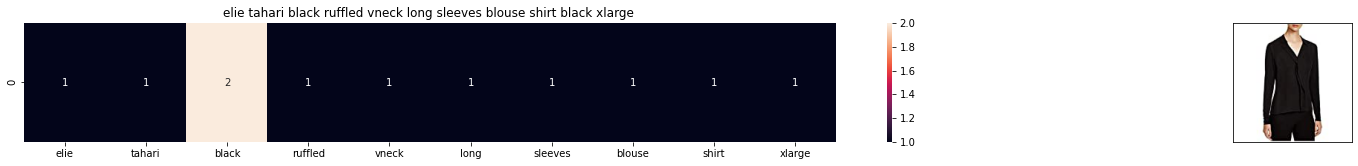

ASIN : B0728DT431
Brand: Elie Tahari
Title: elie tahari black ruffled vneck long sleeves blouse shirt black xlarge 
Euclidean similarity with the query image : 2.220446049250313e-16


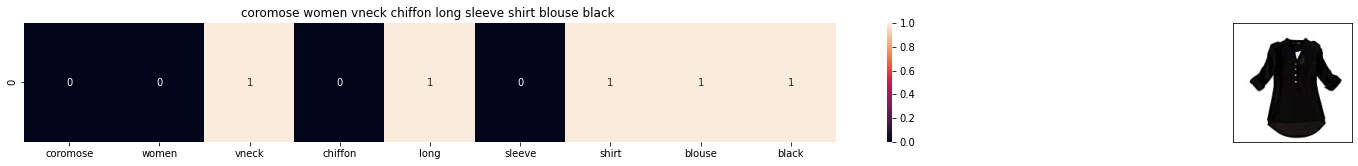

ASIN : B00NNFP22K
Brand: coromose
Title: coromose women vneck chiffon long sleeve shirt blouse black 
Euclidean similarity with the query image : 0.44529980377477096


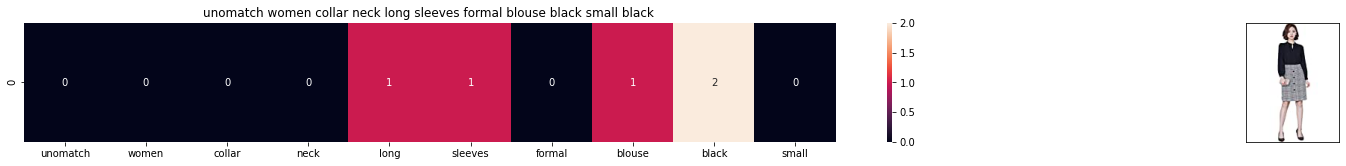

ASIN : B01N9N5VSP
Brand: Unomatch
Title: unomatch women collar neck long sleeves formal blouse black small black 
Euclidean similarity with the query image : 0.46153846153846145


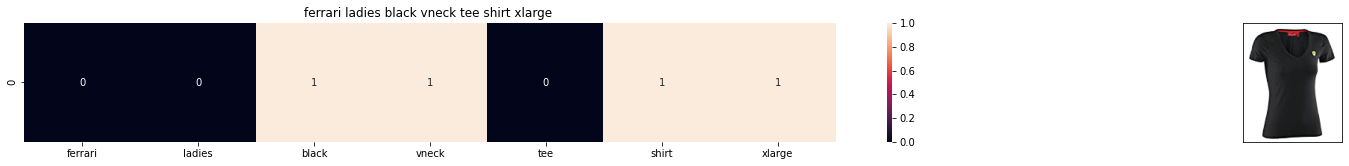

ASIN : B01EZ6XKR4
Brand: Ferrari
Title: ferrari ladies black vneck tee shirt xlarge 
Euclidean similarity with the query image : 0.4758575816390409


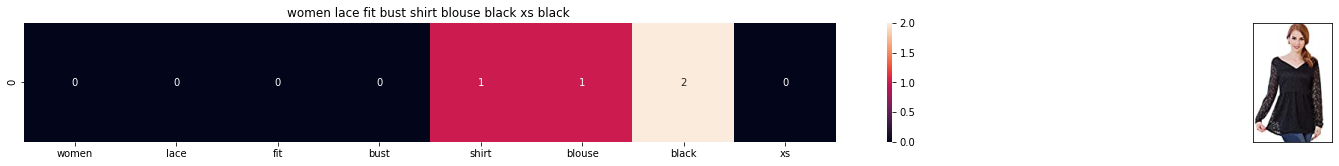

ASIN : B06XWYWG44
Brand: Unomatch
Title: women lace fit bust shirt blouse black xs black 
Euclidean similarity with the query image : 0.49825479399574546


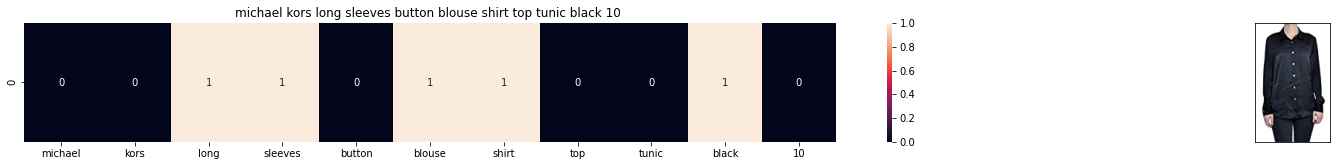

ASIN : B01B7HW7J6
Brand: MICHAEL Michael Kors
Title: michael kors long sleeves button blouse shirt top tunic black 10 
Euclidean similarity with the query image : 0.49825479399574546


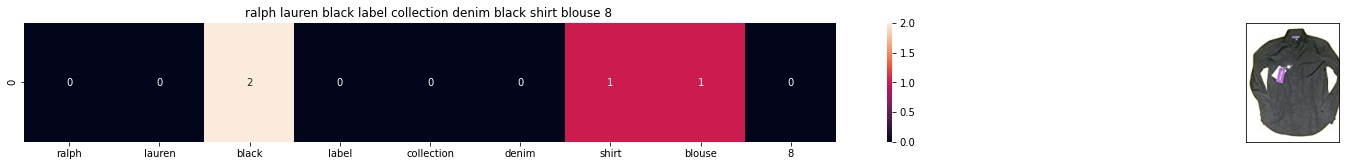

ASIN : B01EUK0EDS
Brand: Ralph Lauren Black Label
Title: ralph lauren black label collection denim black shirt blouse 8 
Euclidean similarity with the query image : 0.49825479399574546


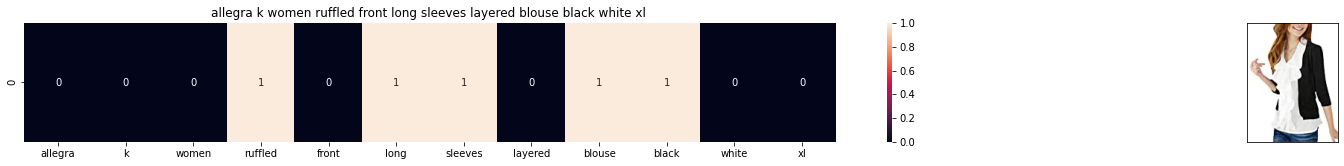

ASIN : B00E1LCYZI
Brand: Allegra K
Title: allegra k women ruffled front long sleeves layered blouse black white xl 
Euclidean similarity with the query image : 0.49825479399574546


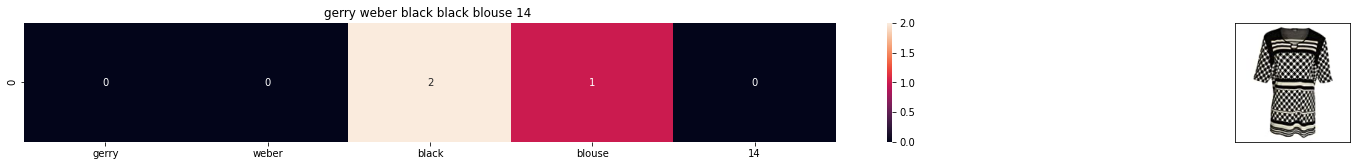

ASIN : B00O492QMI
Brand: Gerry Webber
Title: gerry weber black black blouse 14 
Euclidean similarity with the query image : 0.5097096621545399


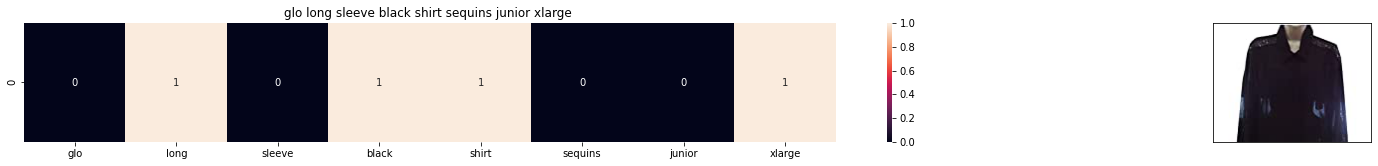

ASIN : B01NBLNC7J
Brand: Glo
Title: glo long sleeve black shirt sequins junior xlarge 
Euclidean similarity with the query image : 0.5097096621545399


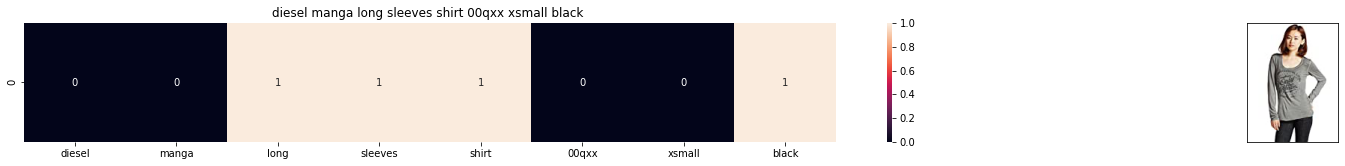

ASIN : B00N2FKJR4
Brand: DIESEL
Title: diesel manga long sleeves shirt 00qxx xsmall black 
Euclidean similarity with the query image : 0.5097096621545399


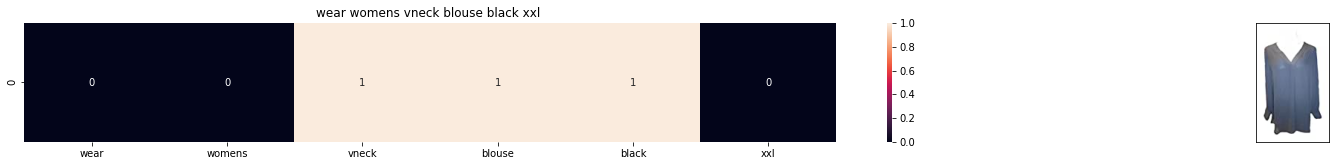

ASIN : B06Y6FH453
Brand: Who What Wear
Title: wear womens vneck blouse black xxl 
Euclidean similarity with the query image : 0.5470891863421616


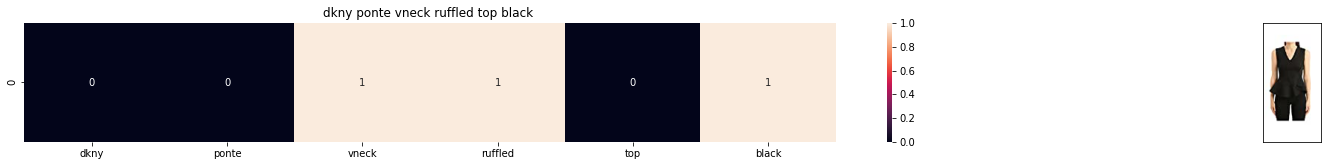

ASIN : B06XH7HQ2T
Brand: DKNY
Title: dkny ponte vneck ruffled top black 
Euclidean similarity with the query image : 0.5470891863421616


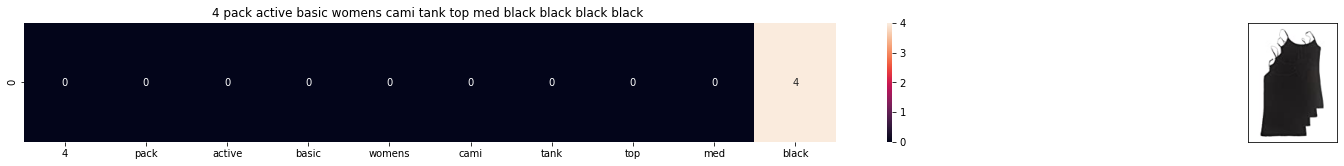

ASIN : B00XIM5SCC
Brand: Active USA
Title: 4 pack active basic womens cami tank top med black black black black 
Euclidean similarity with the query image : 0.5470891863421616


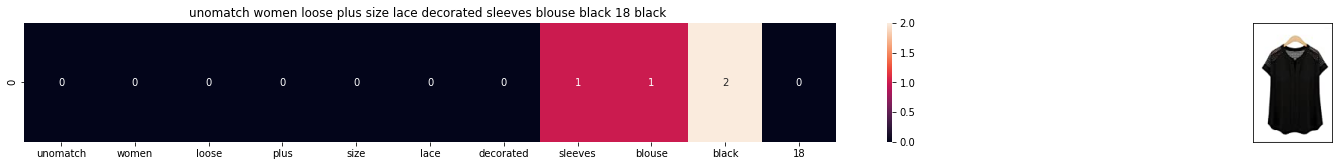

ASIN : B01MZFZOFD
Brand: Unomatch
Title: unomatch women loose plus size lace decorated sleeves blouse black 18 black 
Euclidean similarity with the query image : 0.5552504100033393


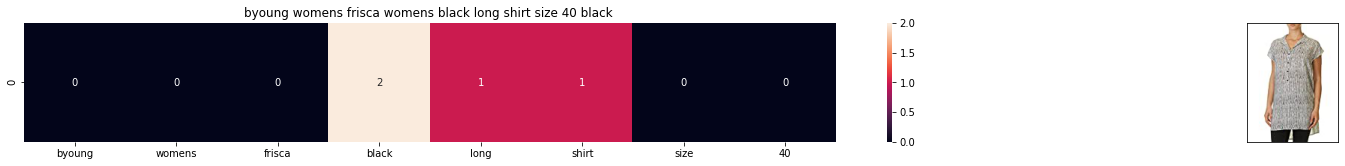

ASIN : B01LXPGQAU
Brand: Byoung
Title: byoung womens frisca womens black long shirt size 40 black 
Euclidean similarity with the query image : 0.5552504100033393


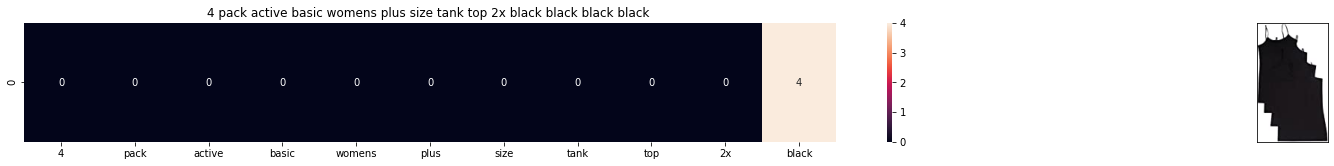

ASIN : B00XQBTD4Y
Brand: Active USA
Title: 4 pack active basic womens plus size tank top 2x black black black black 
Euclidean similarity with the query image : 0.5562398430198167


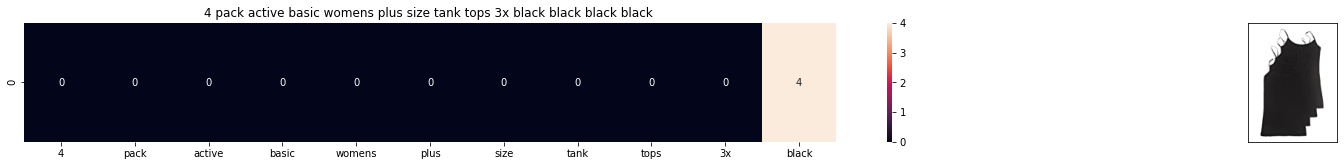

ASIN : B00WV4FI32
Brand: Active Products
Title: 4 pack active basic womens plus size tank tops 3x black black black black 
Euclidean similarity with the query image : 0.5562398430198167


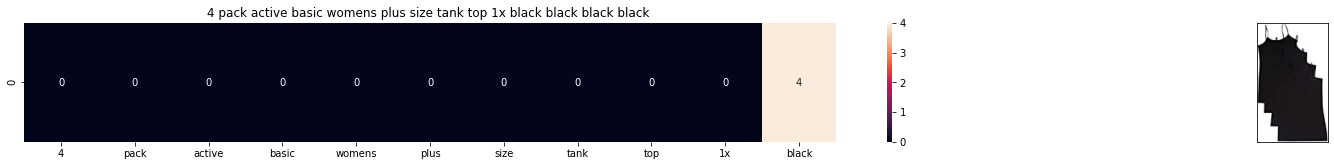

ASIN : B00XQBT51A
Brand: Active USA
Title: 4 pack active basic womens plus size tank top 1x black black black black 
Euclidean similarity with the query image : 0.5562398430198167


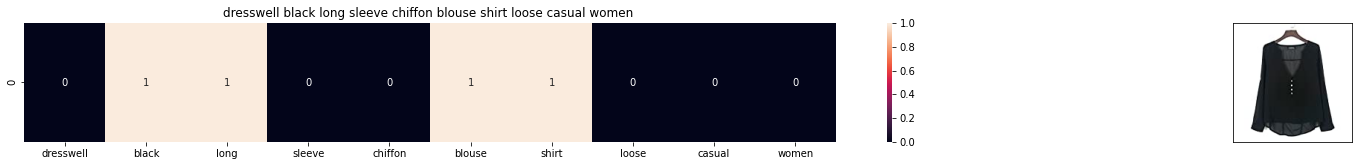

ASIN : B01JS2A3BG
Brand: Dresswell
Title: dresswell black long sleeve chiffon blouse shirt loose casual women 
Euclidean similarity with the query image : 0.5614709903464854


In [ ]:
#call the bag-of-words model for a product to get similar products.
bag_of_words_model(12566, 20) # change the index if you want to.
# In the output heat map each value represents the count value 
# of the label word, the color represents the intersection 
# with inputs title.
# 12566 is the index of the "Query title"
#try 931  

This execution shows us the 20 most similar products related to the apparel at *Id = 12556* (BOW model). This is similar to query in retrieval systems. For example, when you type a query to search for some product on Amazon, the search engine will map your query against a set of keys (featues and feature matrix) associated with candidate products in the database, then present you the best matched videos (values/pdsit in this notebook).  

## **9. TF-IDF based Product Similarity**

Let's import the Term Frequency - Inverse Document Frequency (TF-IDF) method from sklearn and store the ifidf feature matrix.

In [ ]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])
# returns the a sparase matrix of dimensions #data_points * #words_in_corpus
tfidf_title_features.shape
# CountVectorizer().fit_transform(courpus) returns the a sparase matrix of dimensions #data_points * #words_in_corpus
# tfidf_title_features[doc_id, index_of_word_in_corpus] = tfidf values of the word in given doc

(17593, 12927)

Our helper function will recommend us similar apparels using a `doc_id` which is similar to a `query`. We'll use pairwise distance to compare similarites between clusters (tfidf feature matrix).
 

In [ ]:
def tfidf_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    # Similar to Query in Transformers^
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the cosine distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(tfidf_title_features, tfidf_title_features[doc_id])

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i], data['title'].loc[df_indices[0]],
                   data['title'].loc[df_indices[i]],
                   data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('Eucliden distance from the given image :', pdists[i])
        print('='*125)

Now, let's call the tfidf model and see the results. 

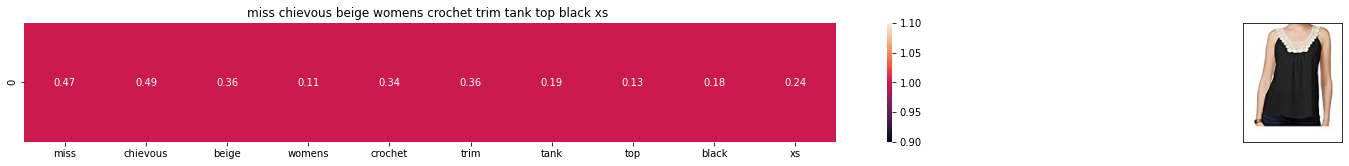

ASIN : B06XQ1ZSSY
BRAND : Miss Chievous
Eucliden distance from the given image : 0.0


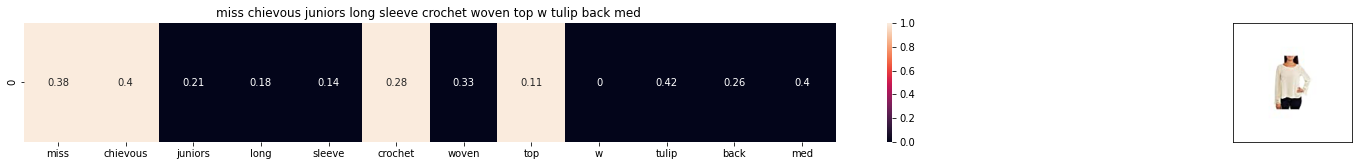

ASIN : B01GUJDLYG
BRAND : Miss Chievous
Eucliden distance from the given image : 1.016751114307753


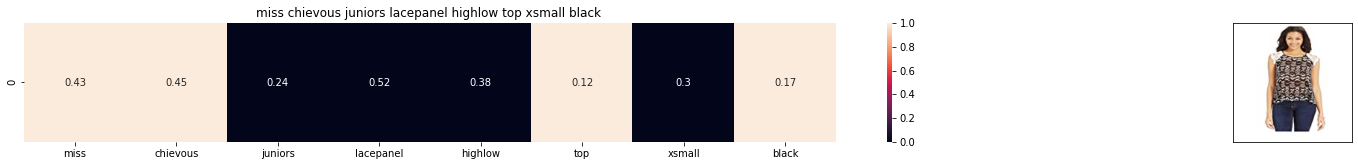

ASIN : B01CINNIPA
BRAND : Miss Chievous
Eucliden distance from the given image : 1.0289086380600996


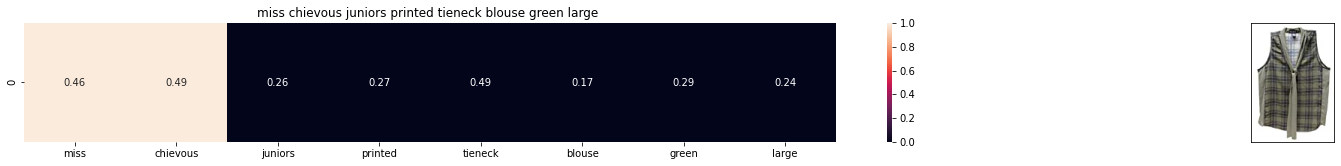

ASIN : B073TMFKT1
BRAND : Miss Chievous
Eucliden distance from the given image : 1.042831218793189


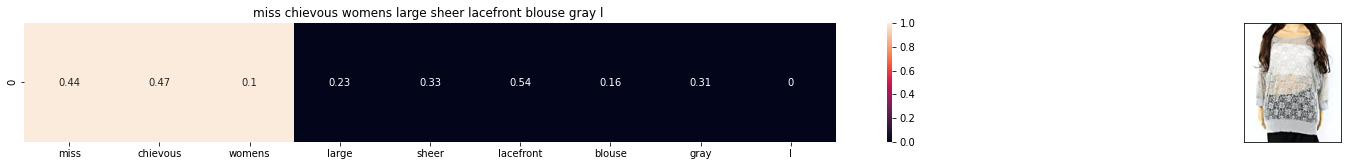

ASIN : B074NC1N5V
BRAND : Miss Chievous
Eucliden distance from the given image : 1.046485853028542


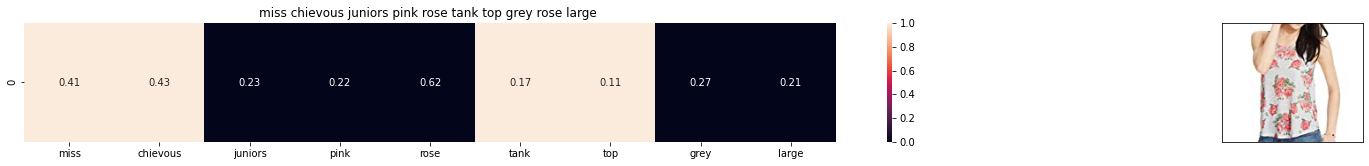

ASIN : B01JKRKZNK
BRAND : Miss Chievous
Eucliden distance from the given image : 1.0483243180732402


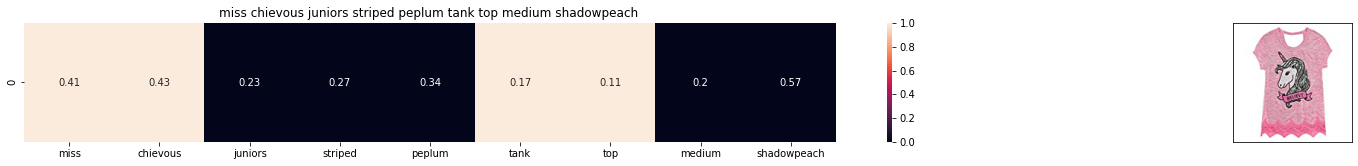

ASIN : B0177DM70S
BRAND : MISS CHIEVOUS/AROUND THE WORLD APP
Eucliden distance from the given image : 1.04866801950514


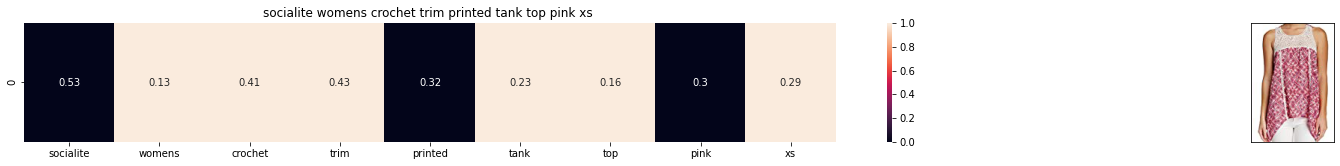

ASIN : B01KZS348Q
BRAND : Socialite
Eucliden distance from the given image : 1.0554255037663358


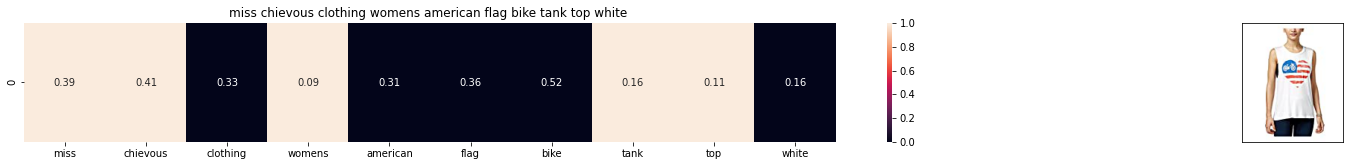

ASIN : B01MA45MER
BRAND : Miss Chievous
Eucliden distance from the given image : 1.0586478696611326


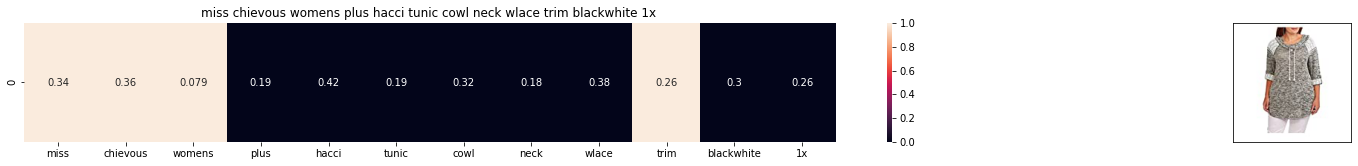

ASIN : B01MY45OOZ
BRAND : Miss Chievous
Eucliden distance from the given image : 1.061418559832755


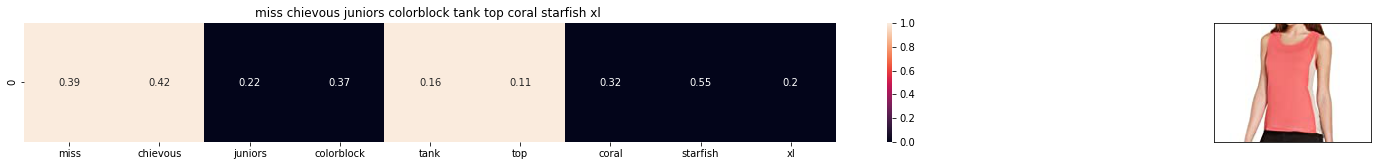

ASIN : B01JKSC98S
BRAND : Miss Chievous
Eucliden distance from the given image : 1.0630604245254391


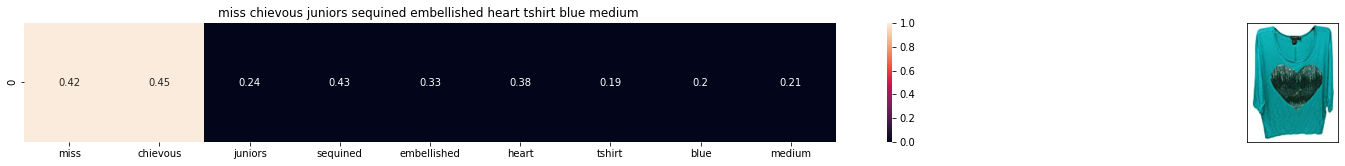

ASIN : B074KHZQ2T
BRAND : Miss Chievous
Eucliden distance from the given image : 1.0772363989227185


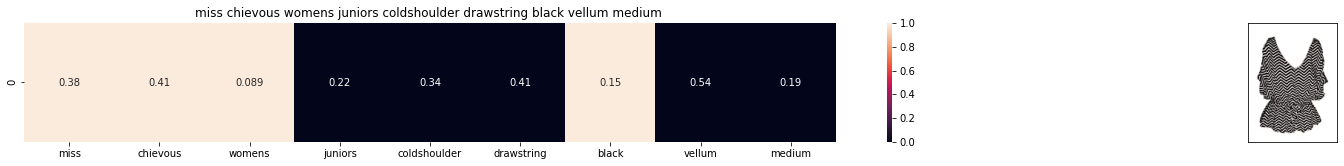

ASIN : B072L65ZHC
BRAND : Miss Chievous
Eucliden distance from the given image : 1.07969458489396


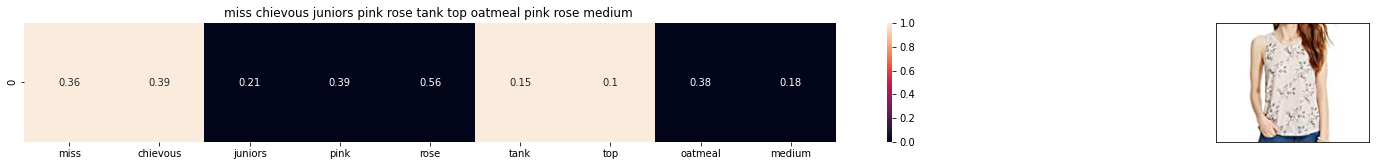

ASIN : B01JKQZ8R4
BRAND : Miss Chievous
Eucliden distance from the given image : 1.09197589961907


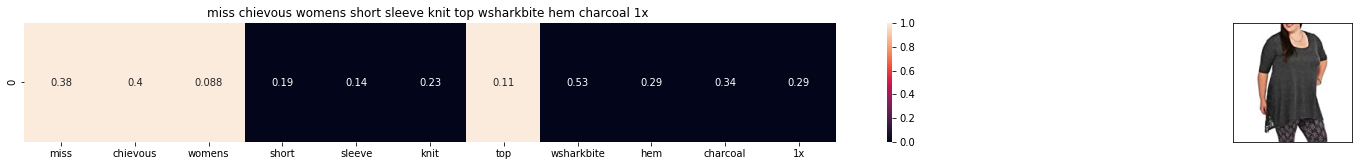

ASIN : B06XR9NTVL
BRAND : Miss Chievous
Eucliden distance from the given image : 1.098155891802055


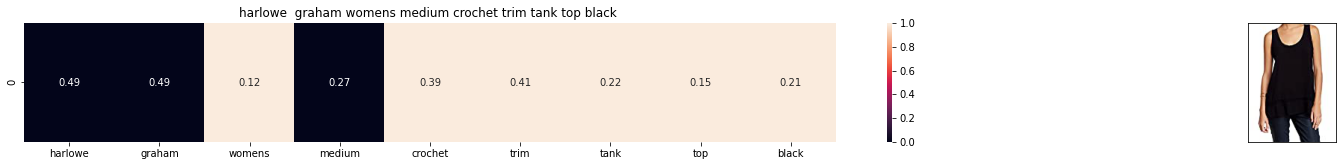

ASIN : B071SD5SK5
BRAND : Harlowe & Graham
Eucliden distance from the given image : 1.0994778392874478


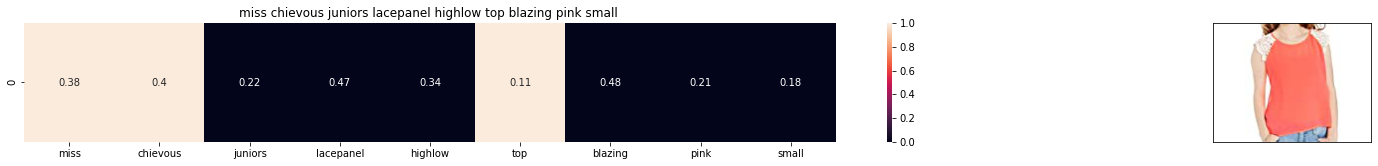

ASIN : B01JKT0QQO
BRAND : Miss Chievous
Eucliden distance from the given image : 1.103030579613157


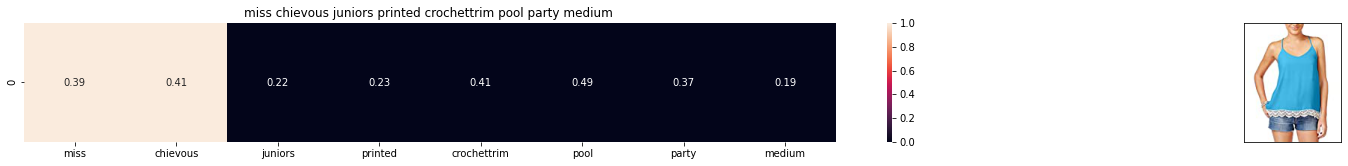

ASIN : B07287C489
BRAND : Miss Chievous
Eucliden distance from the given image : 1.1072127798195106


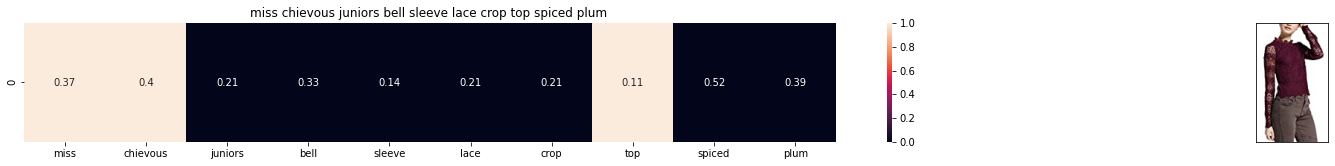

ASIN : B073RRCMR2
BRAND : Miss Chievous
Eucliden distance from the given image : 1.1110121561175845


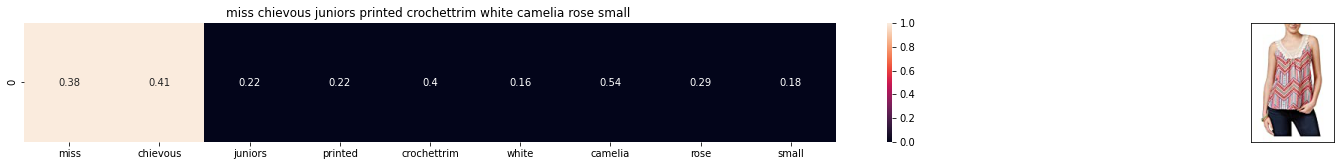

ASIN : B072LKSGB7
BRAND : Miss Chievous
Eucliden distance from the given image : 1.1138647701609699


In [ ]:
tfidf_model(12569, 20)
# in the output heat map each value represents the tfidf values of the label word, the color represents the intersection with inputs title 

This execution shows us the 20 most similar products related to the apparel at *Id = 12569* (tdidf model).

Let's see another example.

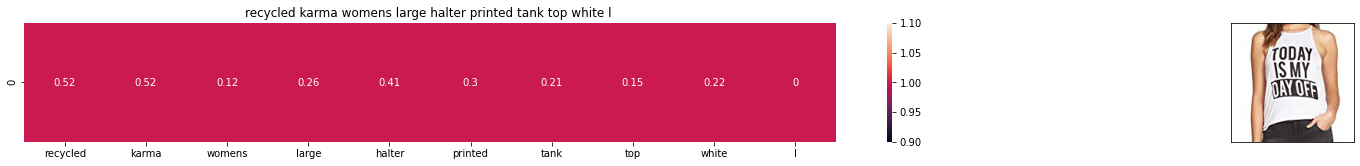

ASIN : B0719L67CD
BRAND : Recycled Karma
Eucliden distance from the given image : 0.0


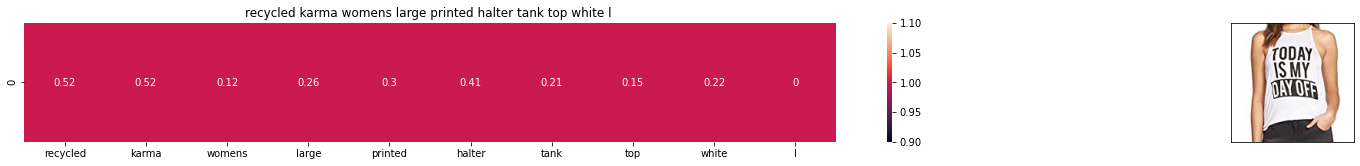

ASIN : B01L0T5X2Y
BRAND : RECYCLED KARMA
Eucliden distance from the given image : 0.0


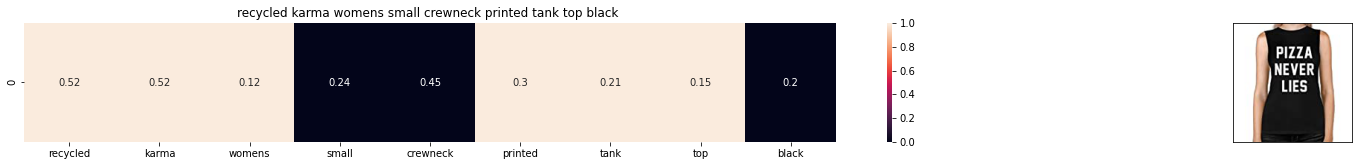

ASIN : B071X6VFTC
BRAND : Recycled Karma
Eucliden distance from the given image : 0.765446770646079


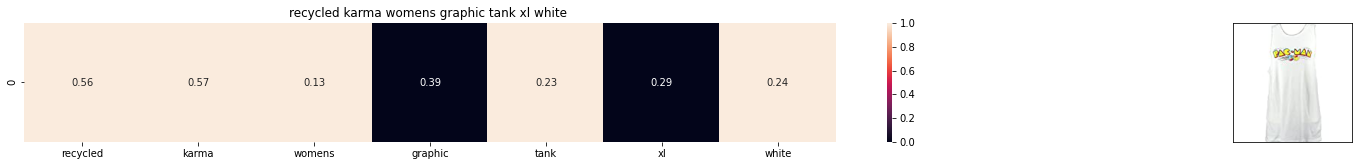

ASIN : B06Y4GQH24
BRAND : Recycled Karma
Eucliden distance from the given image : 0.768413518834631


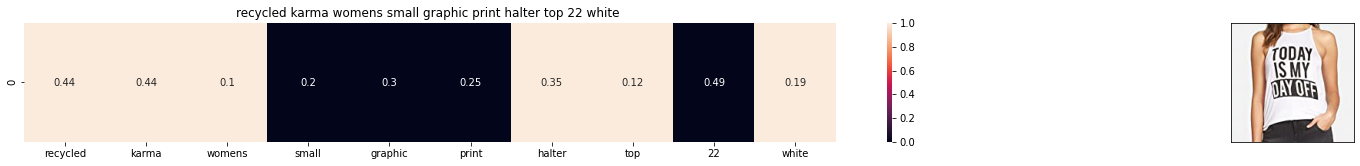

ASIN : B06ZZ3F9YB
BRAND : Recycled Karma
Eucliden distance from the given image : 0.8104296513582432


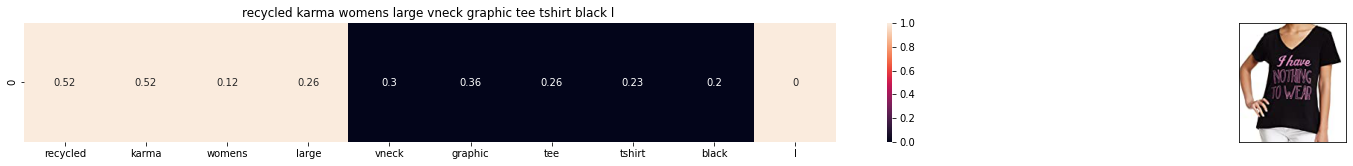

ASIN : B073GZWBFB
BRAND : Recycled Karma
Eucliden distance from the given image : 0.8674441039912657


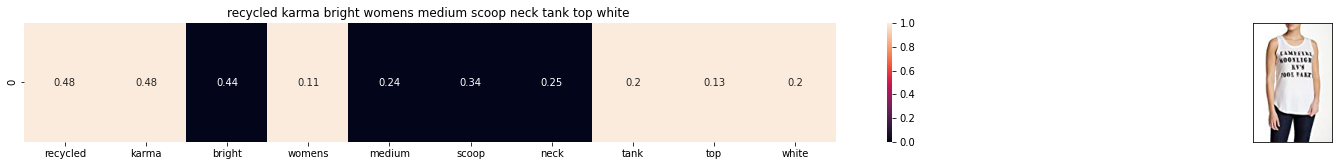

ASIN : B07288K7GG
BRAND : Recycled Karma
Eucliden distance from the given image : 0.8740531363908606


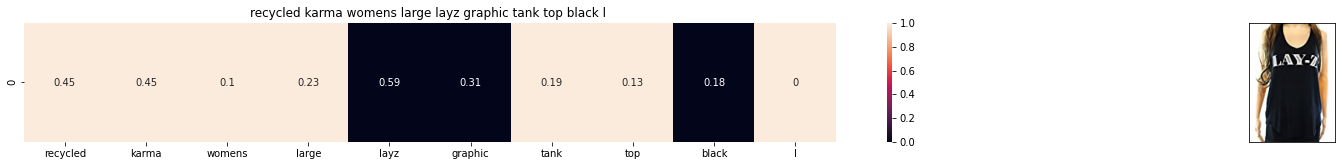

ASIN : B072XLD1VR
BRAND : Recycled Karma
Eucliden distance from the given image : 0.8906771277472938


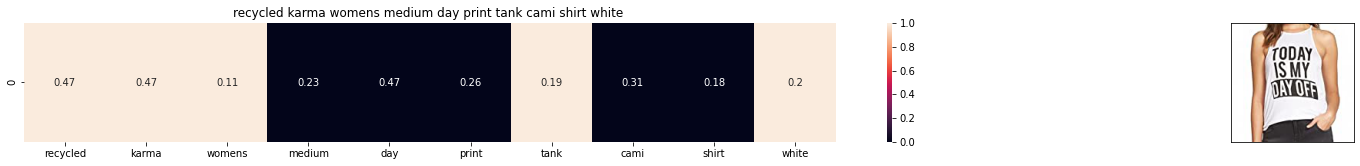

ASIN : B06WW9X328
BRAND : Recycled Karma
Eucliden distance from the given image : 0.913081786476236


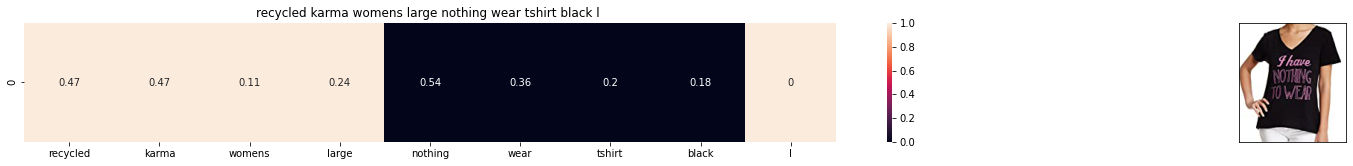

ASIN : B0735228CP
BRAND : Recycled Karma
Eucliden distance from the given image : 0.9362362887478692


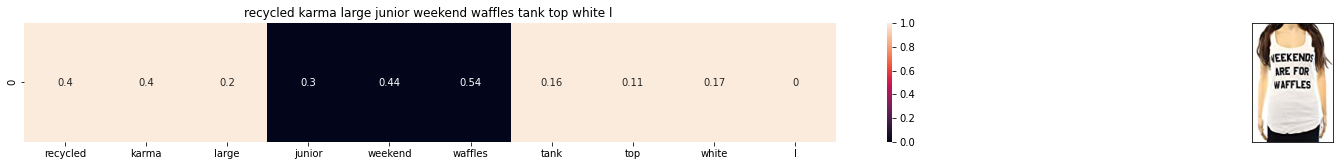

ASIN : B01GRY94TK
BRAND : Recycled Karma
Eucliden distance from the given image : 0.939132980554358


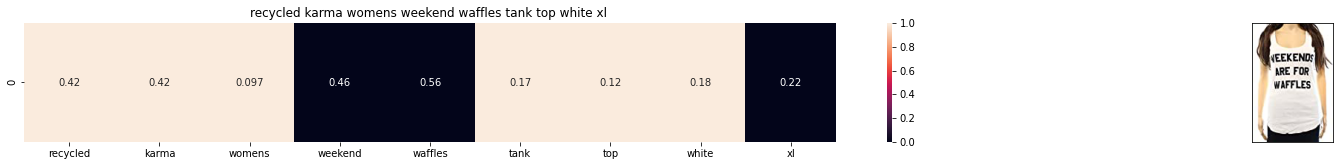

ASIN : B01N292ZVQ
BRAND : Recycled Karma
Eucliden distance from the given image : 0.9611393377818618


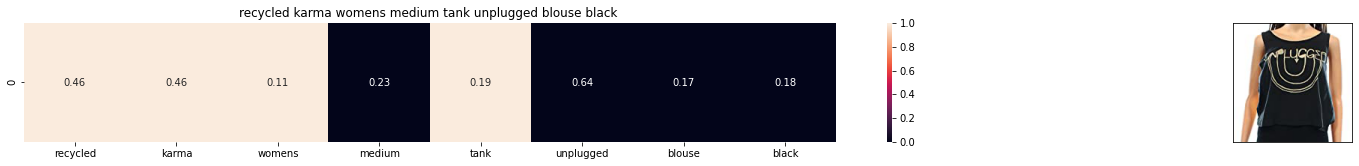

ASIN : B071ZGHDKT
BRAND : Recycled Karma
Eucliden distance from the given image : 0.9664992947396718


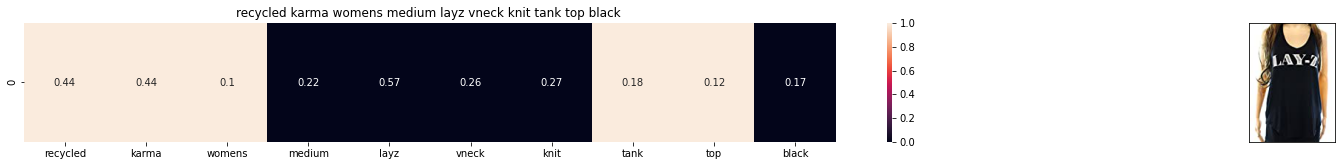

ASIN : B073H1LK4K
BRAND : Recycled Karma
Eucliden distance from the given image : 0.9700284833691869


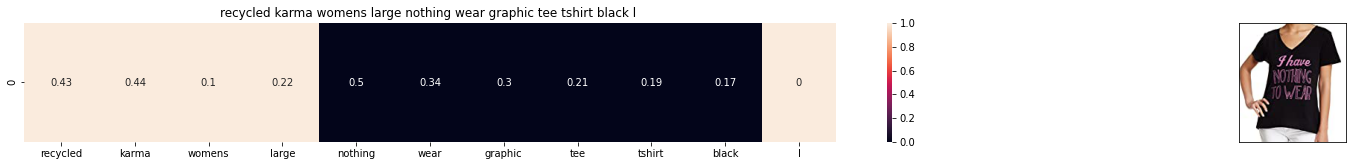

ASIN : B072XKSHF7
BRAND : Recycled Karma
Eucliden distance from the given image : 0.9772160942235719


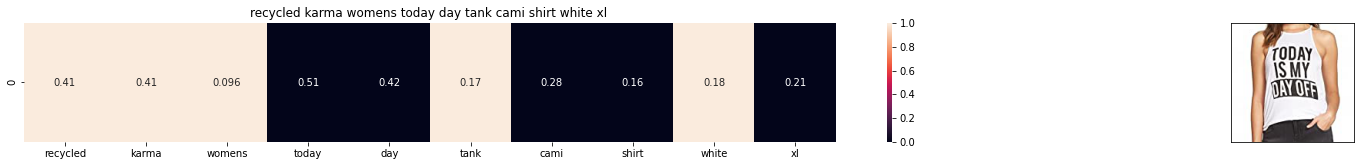

ASIN : B01FM8UTYG
BRAND : RECYCLED KARMA
Eucliden distance from the given image : 0.9829985492417144


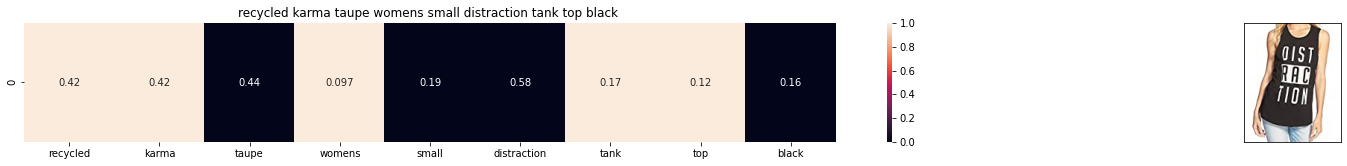

ASIN : B071JRW7LH
BRAND : Recycled Karma
Eucliden distance from the given image : 1.00070251548896


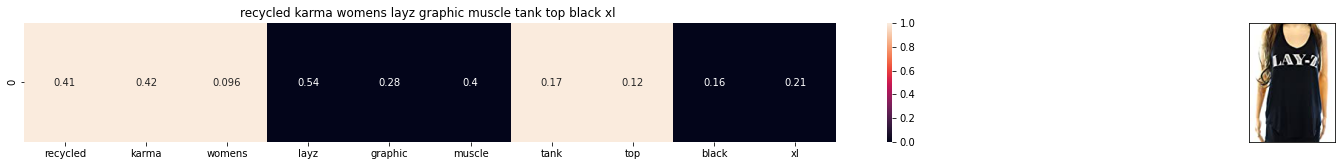

ASIN : B07319VW8N
BRAND : Recycled Karma
Eucliden distance from the given image : 1.0039161094334592


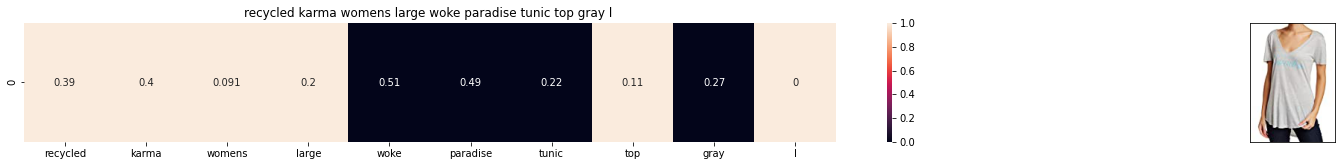

ASIN : B072XLD3DQ
BRAND : Recycled Karma
Eucliden distance from the given image : 1.008694204647399


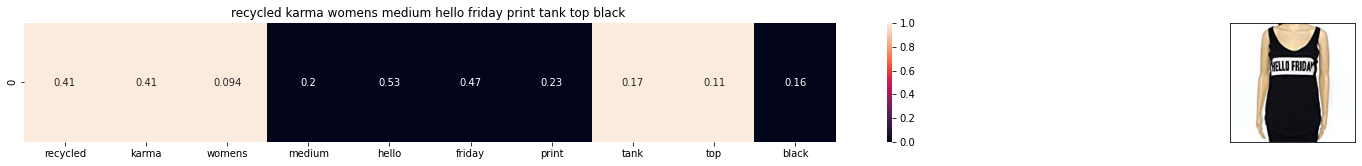

ASIN : B0756KJJZQ
BRAND : Recycled Karma
Eucliden distance from the given image : 1.0130664424263836


In [ ]:
tfidf_model(15099, 20)

This execution shows us the 20 most similar products related to the apparel at *Id = 15099* (tfidf model).

## **10. Summary**

As you can see the system is quite accurately giving us the product recommendation. I think the BOW model is giving us quite a good variety of products and also displaying different types of brands. In tfidf model, the products are quite restricted to being similar and of the same brand but BOW is giving us a better variety since it is changing the brands.


In this notebook we learned,
- Basic data statistics.
- How to build an easy recommendation system using BOW and TF-IDF.
- Visualized the results with heatmaps and images from json files.
- Used cosine similarity and pariwise distances as metrics to evaluate product similarity.

Due to time constraints and an easy to use application, I used only around 17k data points, if you have time to spare you can get even better results by not dropping the null values. On the other hand, removing duplicates was quite important as in the last fewer words the only thing irrelavant was the size of the apparel, it is pretty obvious the customer doesn't want to see the exact same product with only a change in the size, hence removing it was a must.

Finally, you can also try using weighted word2vec models from gensim to make a new feature matrix which will pay attention to the important part in the titles.